Your Name and PRN:
- Name : ______________________
- PRN  : ______________________
- Date : ______________________

In [1]:
# Deep Neural Networks
## Assignment 02


## Take Single Layer Model and add Sigmoid activation function

In [22]:
###-----------------
### Import libraries
###-----------------
from pathlib import Path  # Import Path for file system path operations and management
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split  # Import function to split dataset into training and testing subsets
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             f1_score)  # Import function to calculate various metric
from ipywidgets import widgets,interact

In [3]:
###------------------
### Global Parameters
###------------------

# Directories
#inpDir = '../../input' 
inpDir = Path('..') / '..' / 'input'
# outDir = '../output'
outDir = Path('..') / 'output'


RANDOM_STATE = 24 
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
rng = np.random.default_rng(seed = RANDOM_STATE)

TEST_SIZE  = 0.2 # Size of test data
NOISE = 0.2
EPOCHS = 201
ALPHA = 0.001
N_SAMPLE  = 1000


# Parameters for plotting
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [4]:
def fn_plot_decision_boundary(X: np.ndarray, wts: np.ndarray, pred_func):
    """
    Plots the decision boundary for a classification model along with the data points.
    
    Args:
        X (np.ndarray): Input feature matrix with shape (n_samples, 3)
        wts (np.ndarray): Weights matrix
        pred_function: Function to predict using weights and datapoints
    """
    
    # Initialize the figure with specified dimensions
    fig, ax = plt.subplots( figsize=(8, 5) )
    
    # Small increment value to create a fine grid for smooth decision boundary
    dm = 0.01
    padding = 2 * dm
    
    # Calculate the range for x-axis (first feature) with padding
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    
    # Calculate the range for y-axis (second feature) with padding  
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding
    
    # Create a mesh grid covering the entire feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # Flatten the mesh grid arrays and stack them column-wise to create coordinate pairs
    XX = np.c_[xx.ravel(), yy.ravel()] # Resulting shape: (n_points, 2)

    # Add a column of ones to the coordinate array for the bias term
    XX = np.hstack((XX, np.ones((XX.shape[0], 1)))) # make array compatible 
    
    # List to collect predictions for each point in the mesh grid
    y_pred = []
    
    # Iterate over each coordinate point in the mesh grid
    for row in XX:
        # Make prediction for the current coordinate using global 'weights' and 'predict' function
        
        #####-----------------
        a = pred_func(row, wts)
        y_p = 0
        if a >= 0.5: y_p = 1
        y_pred.append(y_p)
        #####-----------------
        
    # Reshape predictions to match the original mesh grid dimensions
    Z = np.array(y_pred).reshape(xx.shape)

    # Create filled contour plot showing the decision regions
    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    
    # Scatter plot of the actual data points, colored by their true class labels
    ax.scatter(X[:, 0], X[:, 1], c=X[:, 2], s=20, edgecolor='k', cmap=plt.cm.bwr)
    
    # Set plot title and axis labels
    ax.set_title('Decision Boundary')
    ax.set_xlabel('A')  
    ax.set_ylabel('B') 
    
    # Display the final plot
    plt.show()

In [5]:
def fn_plot_decision_boundary2(X: np.ndarray, wts: np.ndarray, pred_func,alpha,epoch,error):
    """
    Plots the decision boundary for a classification model along with the data points.
    
    Args:
        X (np.ndarray): Input feature matrix with shape (n_samples, 3)
        wts (np.ndarray): Weights matrix
        pred_function: Function to predict using weights and datapoints
    """
    
    # Initialize the figure with specified dimensions
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12, 5) )
    
    # Small increment value to create a fine grid for smooth decision boundary
    dm = 0.01
    padding = 2 * dm
    
    # Calculate the range for x-axis (first feature) with padding
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    
    # Calculate the range for y-axis (second feature) with padding  
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding
    
    # Create a mesh grid covering the entire feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # Flatten the mesh grid arrays and stack them column-wise to create coordinate pairs
    XX = np.c_[xx.ravel(), yy.ravel()] # Resulting shape: (n_points, 2)

    # Add a column of ones to the coordinate array for the bias term
    XX = np.hstack((XX, np.ones((XX.shape[0], 1)))) # make array compatible 
    
    # List to collect predictions for each point in the mesh grid
    y_pred = []
    
    # Iterate over each coordinate point in the mesh grid
    for row in XX:
        # Make prediction for the current coordinate using global 'weights' and 'predict' function
        
        #####-----------------
        a = pred_func(row, wts)
        y_p = 0
        if a >= 0.5: y_p = 1
        y_pred.append(y_p)
        #####-----------------
        
    # Reshape predictions to match the original mesh grid dimensions
    

    # Create filled contour plot showing the decision regions
    Z = np.array(y_pred).reshape(xx.shape)
    ax1.contourf(xx,yy,Z,alpha = 0.6,cmap = CMAP);
    ax1.scatter(X[:,0],X[:,1],s = 30,cmap = plt.cm.bwr,c=X[:, 2],edgecolors='k')

    ax1.set_title(f'Decision Boundary alpha : {alpha} epoch : {epoch}')
    ax1.set_xlabel('F1')  
    ax1.set_ylabel('F2') 

    #for error curve

    ax2.plot(error)
    ax2.set_title(f'Error plot')
    ax2.set_ylabel('Error') 
    
    
    # Display the final plot
    plt.show()

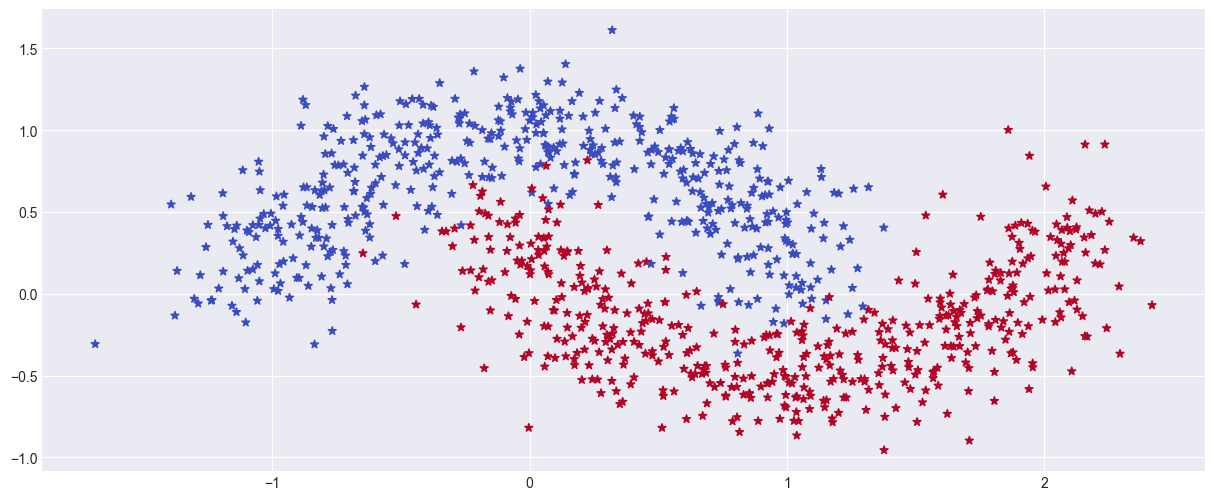

In [6]:
X,y  = make_moons(n_samples=N_SAMPLE,noise=NOISE,random_state=RANDOM_STATE,shuffle=True)


plt.scatter(X[:,0],X[:,1],c=y,cmap= CMAP,marker='*')



In [7]:
data_df = pd.DataFrame(X,columns=['A','B'])
data_df['target'] = y
data_df

A         B  target
0    0.906340  0.902676       0
1   -1.115368  0.755793       0
2    1.887692  0.417597       1
3   -0.933450 -0.022999       0
4   -0.968729  0.063963       0
..        ...       ...     ...
995 -1.005476  0.490728       0
996 -0.484457  0.846436       0
997  0.284856  0.793560       0
998  1.712514 -0.177786       1
999 -0.958774  0.538358       0

[1000 rows x 3 columns]

In [8]:
data_train,data_test  = data_df.to_numpy()[:900],data_df.to_numpy()[900:]
data_train.shape,data_test.shape

((900, 3), (100, 3))

In [9]:
#sigmoid function

def fn_sigmoid(z: np.ndarray) -> float:
    return 1 / (1 + np.exp(-z))

In [10]:
#predict function takes each row and wieghts as input and find output for every row using sigmoid function
def predict(row, weights):
    z = weights[0]
    for i in range(len(row)-1):
        z += weights[i+1] * row[i]
    return fn_sigmoid(z)


In [11]:
#implements backpropagtion for every row to optimize output 

def train_weights(train,alpha,n_epoch):
    error = [] #to trrack error 
    weights = rng.random(train.shape[1]) #initialize random weights 
    m = train.shape[0] #total rowns 
    for epoch in range(n_epoch): #looping for num epoch
        sum_error = 0 #collicting error for each epoch
        for row in train:
            a = predict(row, weights)
            dz = a - row[-1]
            err = - row[-1] * np.log(a) - (1-row[-1]) * np.log(1-a)
            sum_error += err
            weights[0] = weights[0] - alpha *dz
            for i in range(len(row)-1):
                weights[i+1] = weights[i+1] - alpha * dz * row[i]
        error.append(sum_error / m)
    return error , weights



In [12]:
error,weights = train_weights(train=data_train,alpha = ALPHA,n_epoch=EPOCHS)
error[:5],weights


([np.float64(0.7280239319141064),
  np.float64(0.6594814343815277),
  np.float64(0.6065079253404795),
  np.float64(0.5653201036263649),
  np.float64(0.5328931805510214)],
 array([ 0.42414955,  1.17647712, -4.28863186]))

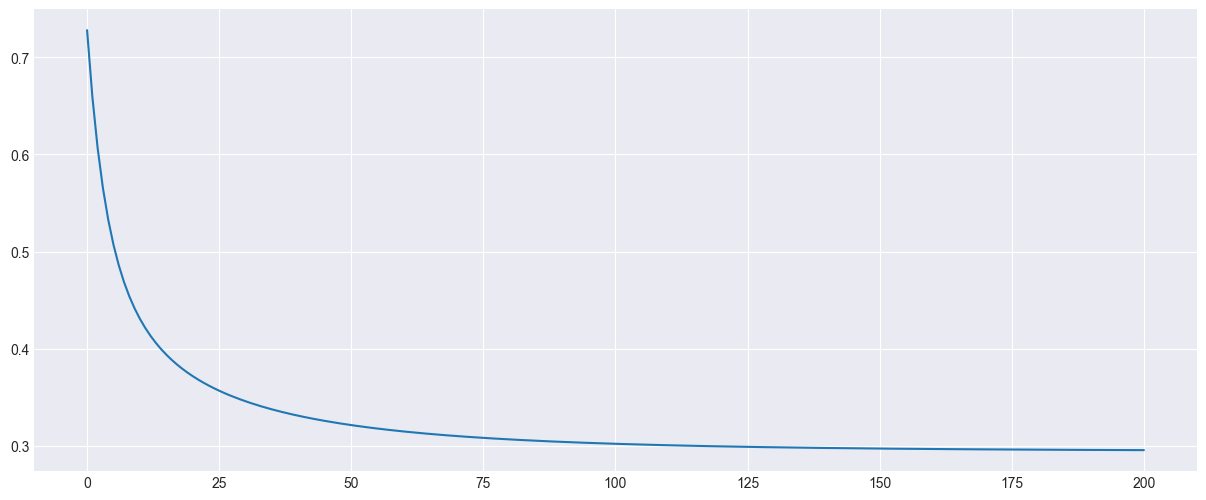

In [13]:
fig,ax = plt.subplots()
ax.plot(error)

[[-1.78879487 -1.78879487]
 [-1.77879487 -1.78879487]
 [-1.76879487 -1.78879487]
 ...
 [ 2.49120513  2.51120513]
 [ 2.50120513  2.51120513]
 [ 2.51120513  2.51120513]]


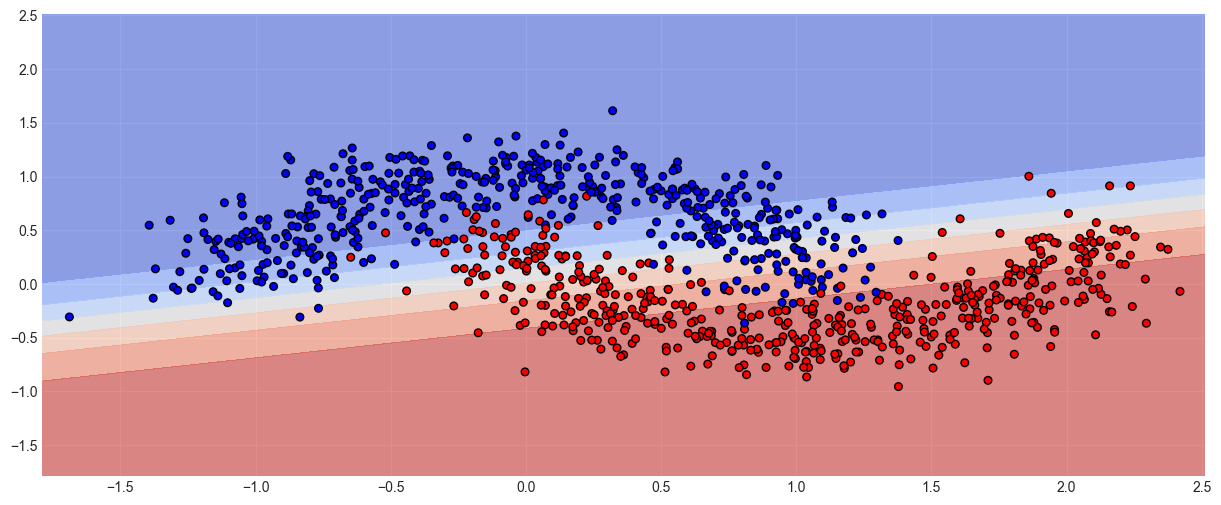

In [14]:

fig,ax = plt.subplots()

dm = 0.01
margin = 10*dm

x_max,x_min = X[:,0].max() + margin, X[:,0].min() - margin
y_max,y_min = X[:,0].max() + margin, X[:,0].min() - margin


xx,yy = np.meshgrid(np.arange(x_min,x_max,dm),
                    np.arange(y_min,y_max,dm))
X_plot = np.c_[xx.ravel(),yy.ravel()]
print(X_plot)
X_plot = np.hstack((X_plot,np.ones((X_plot.shape[0],1))))

y_pred = []
for row in (X_plot):
    y_p = predict(row,weights)
    y_pred.append(y_p)

Z = np.array(y_pred).reshape(xx.shape)
ax.contourf(xx,yy,Z,alpha = 0.6,cmap = CMAP);
ax.scatter(X[:,0],X[:,1],s = 30,cmap = plt.cm.bwr, c = y,edgecolors='k')

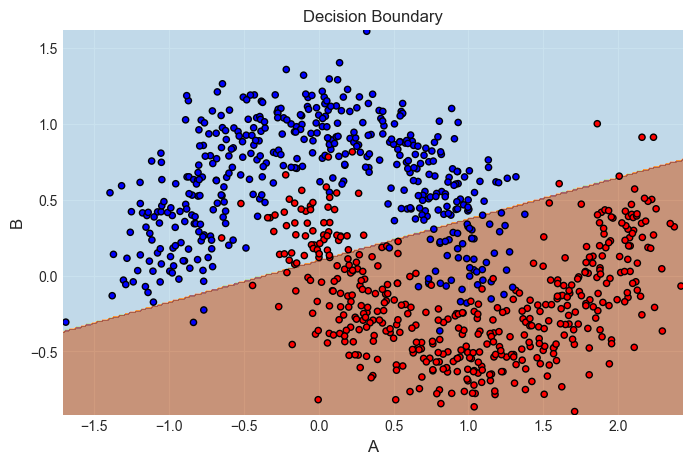

In [15]:
fn_plot_decision_boundary(data_train, weights, predict)

<h1>Comaparing for different alpha and epochs</h1>

In [18]:
epochs = [5,10,100,500,1000]
alphas = [0.01,0.1,0.2,0.5]


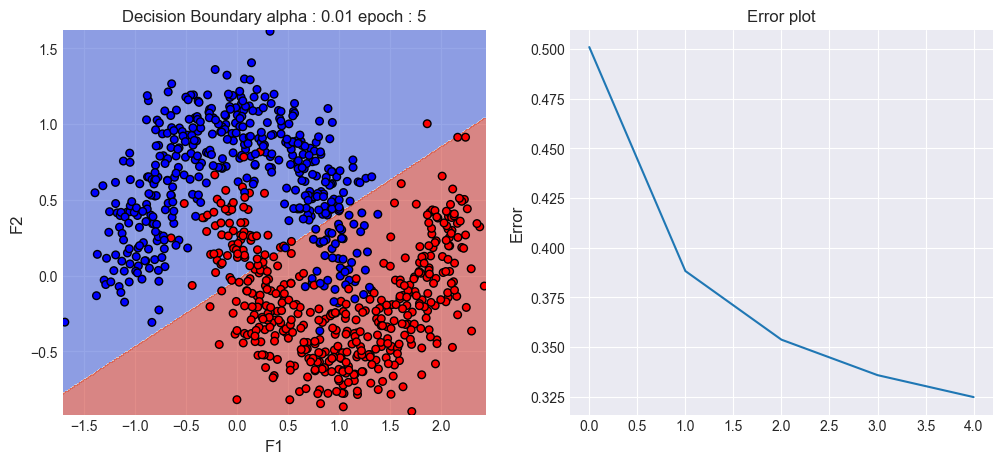

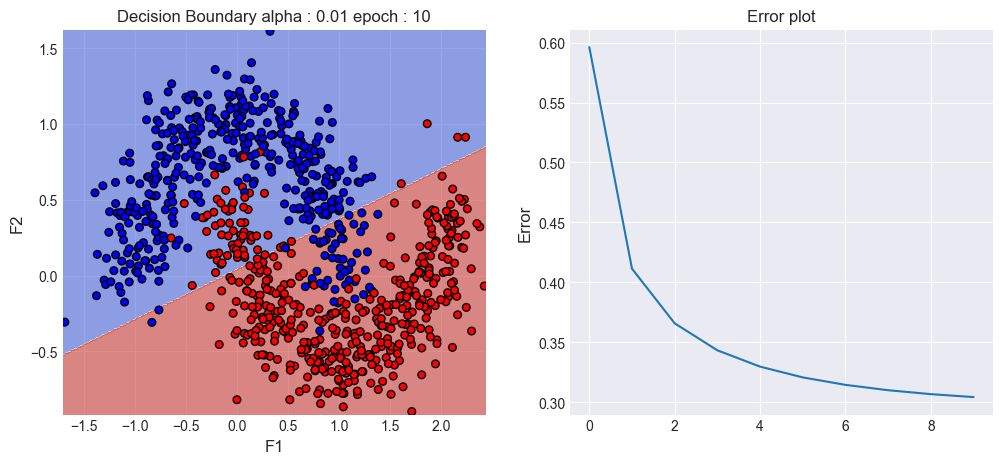

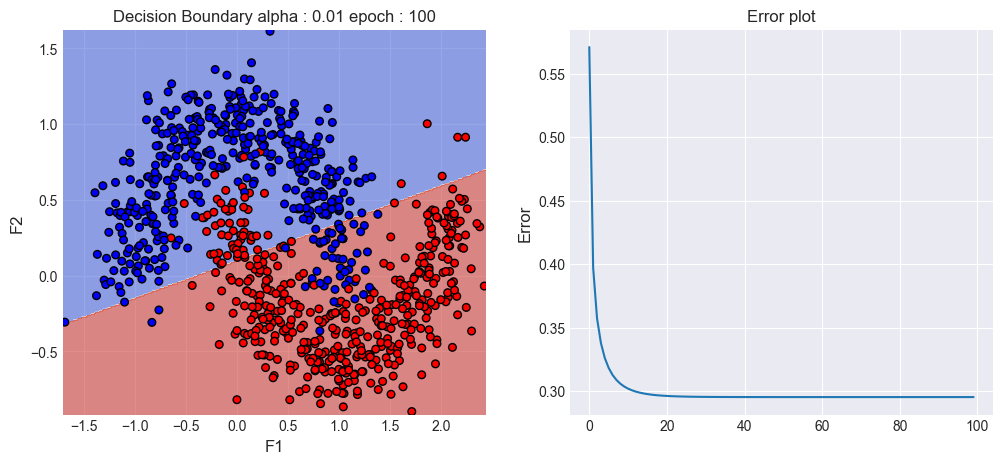

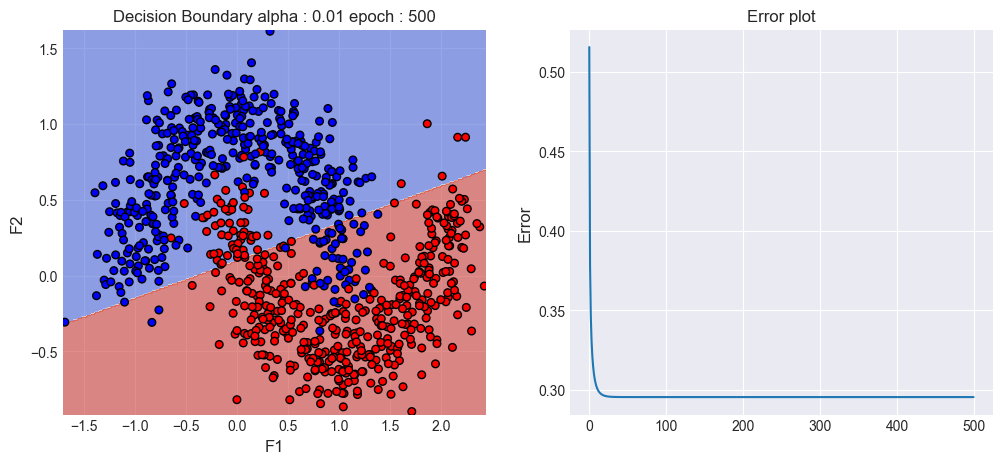

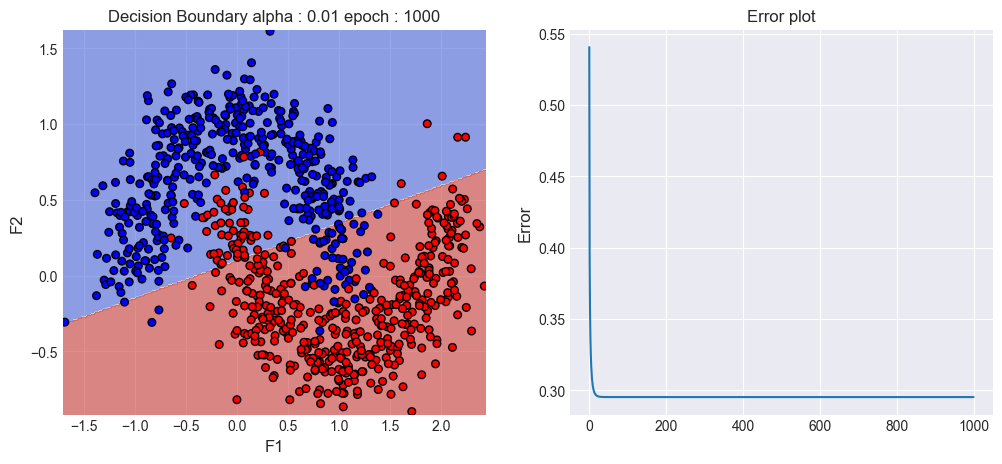

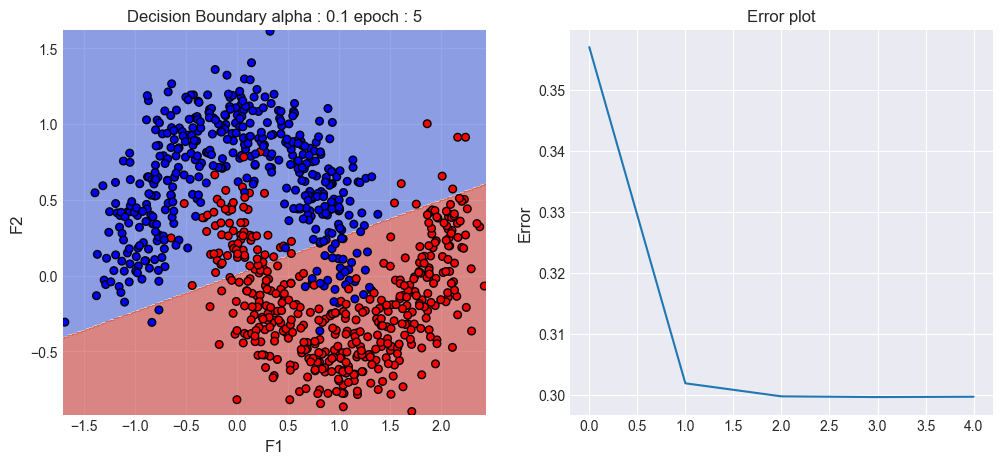

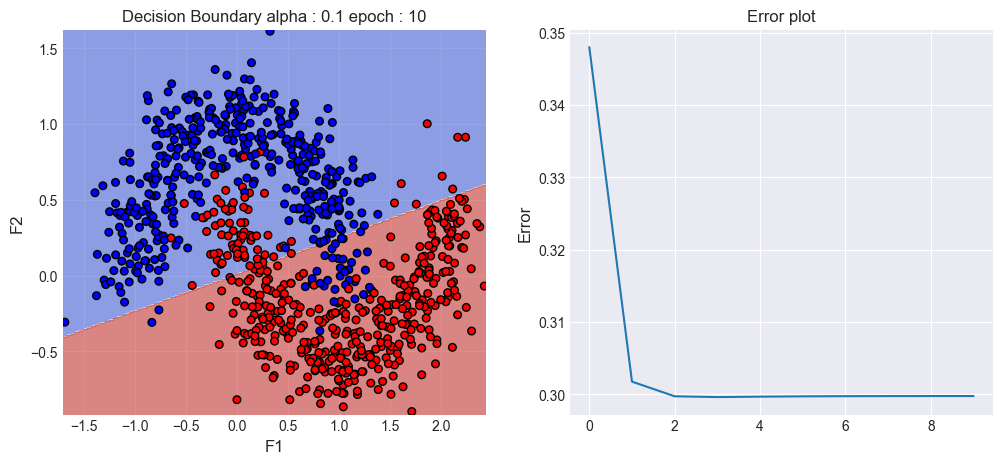

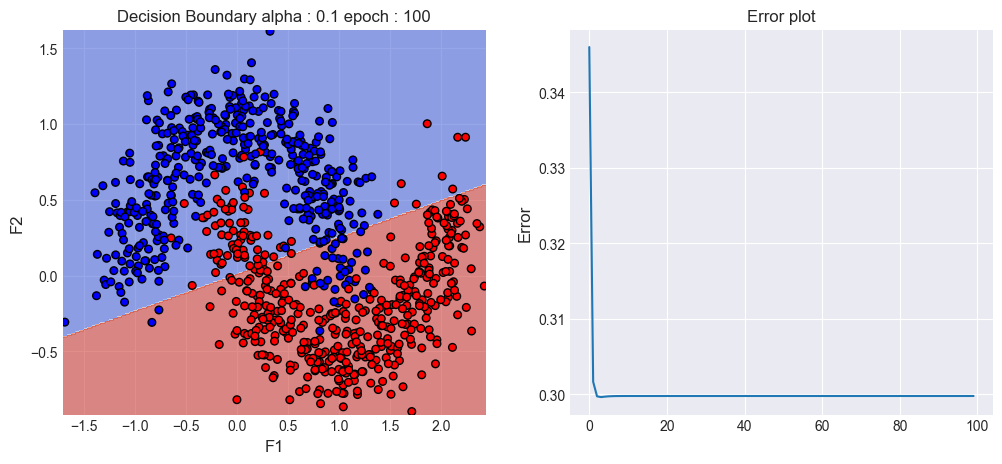

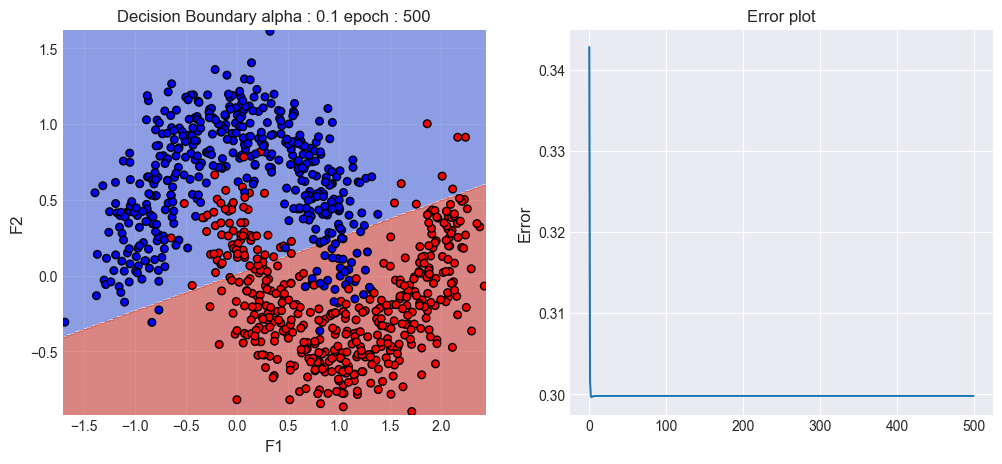

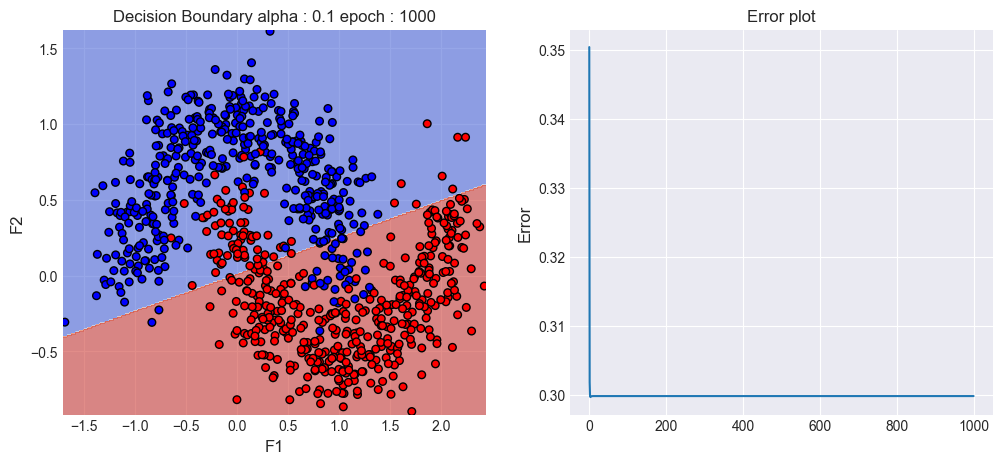

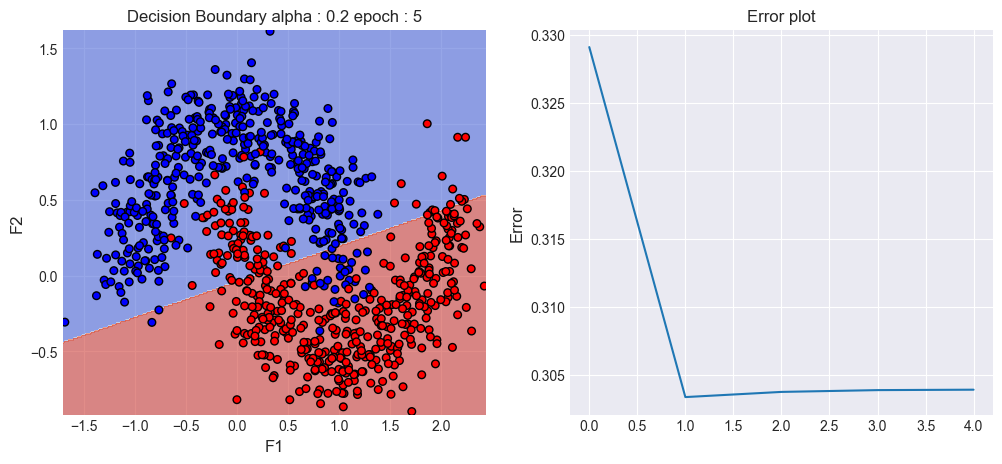

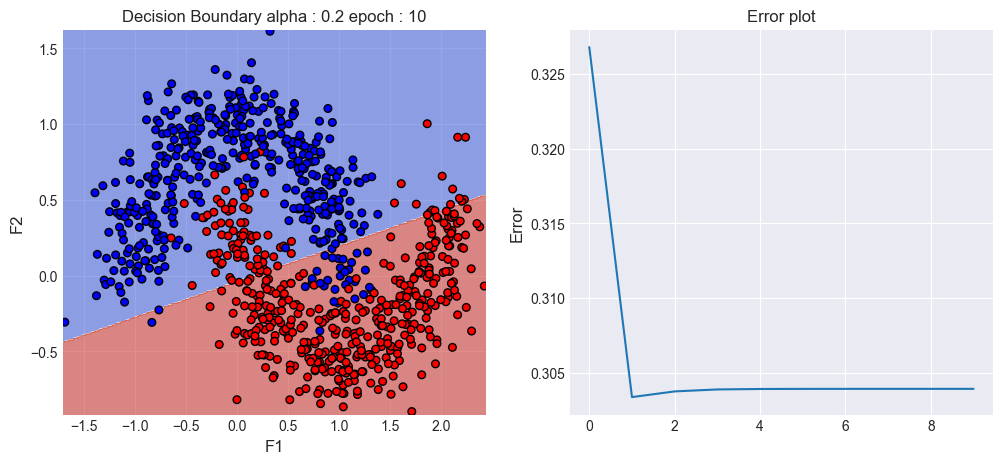

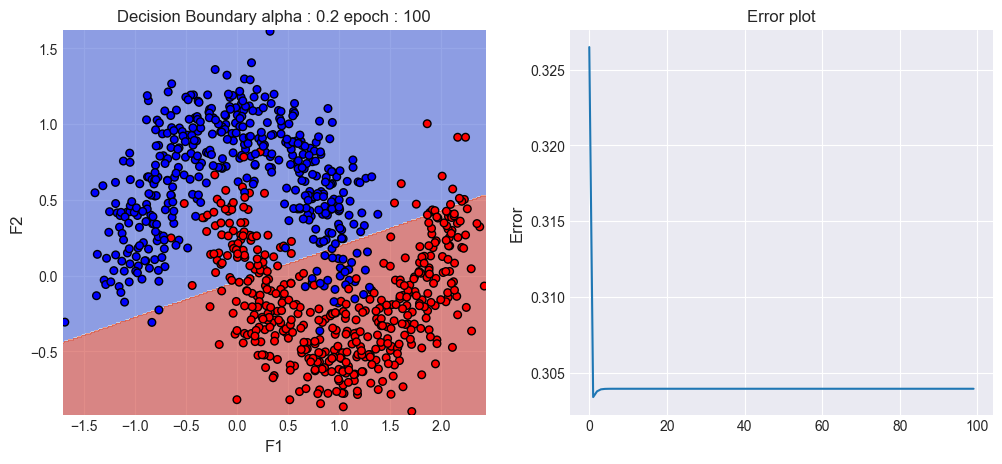

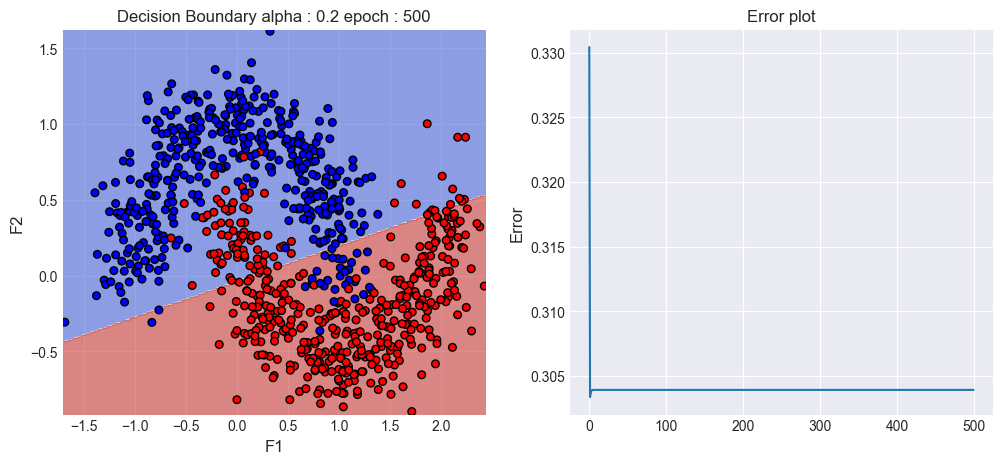

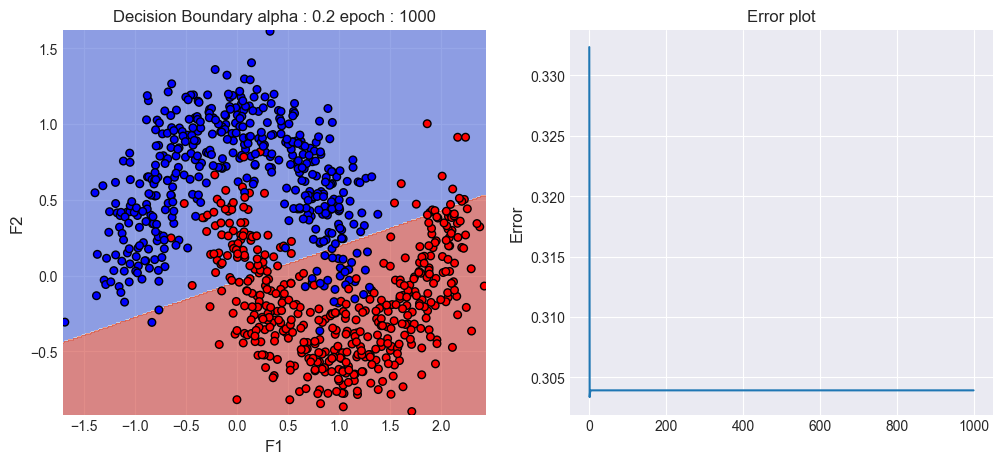

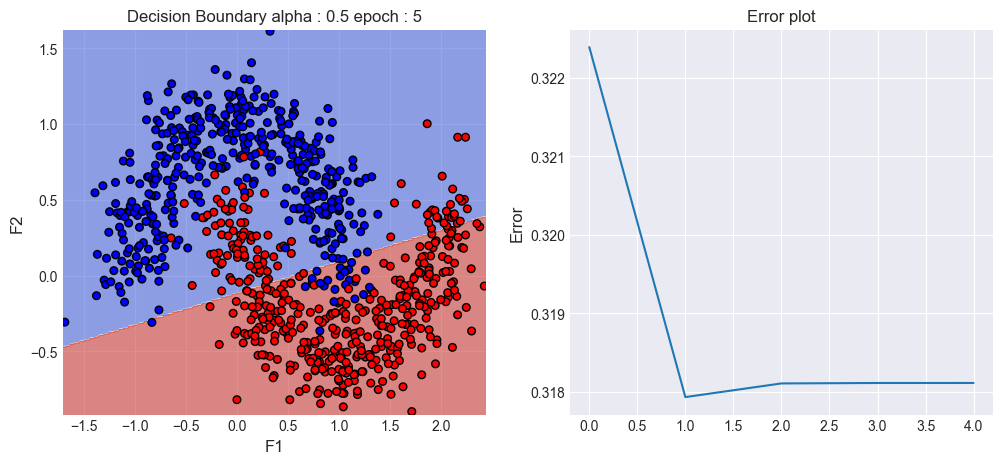

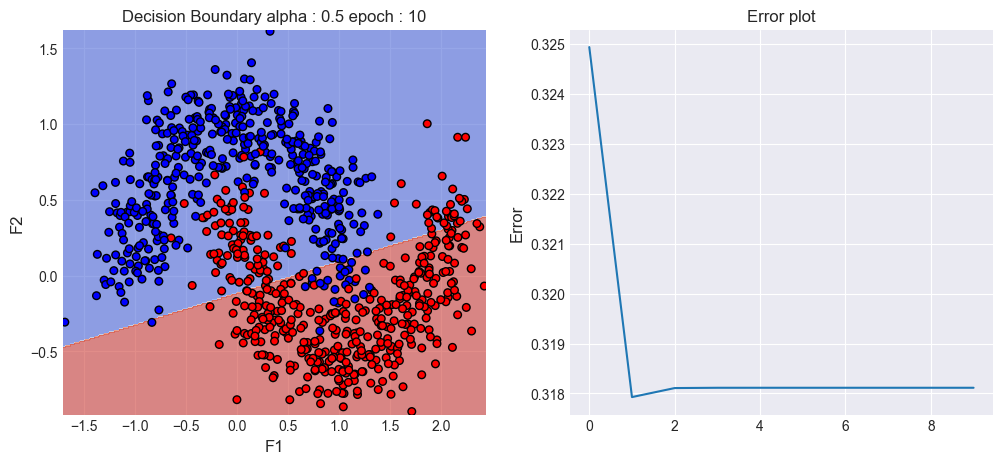

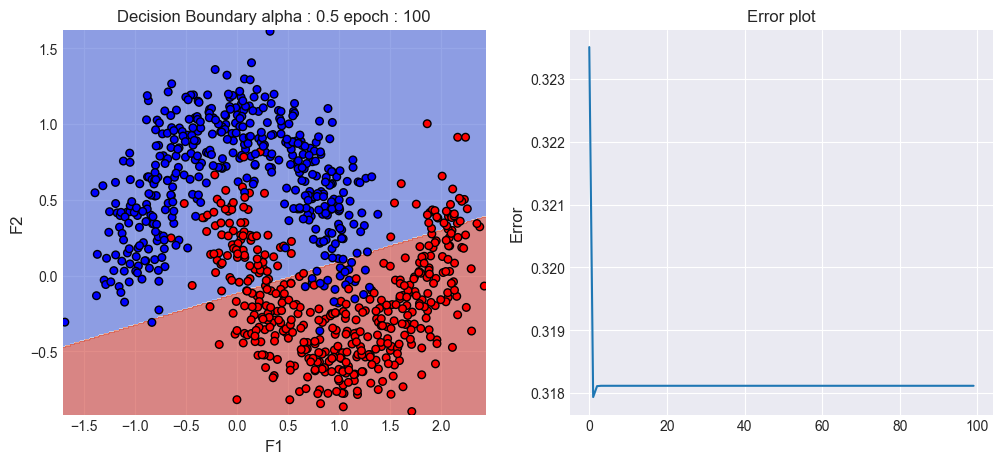

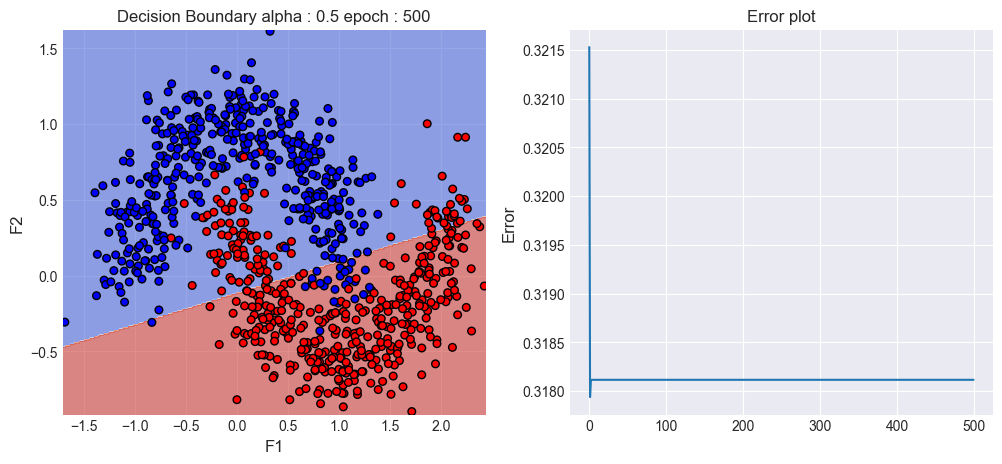

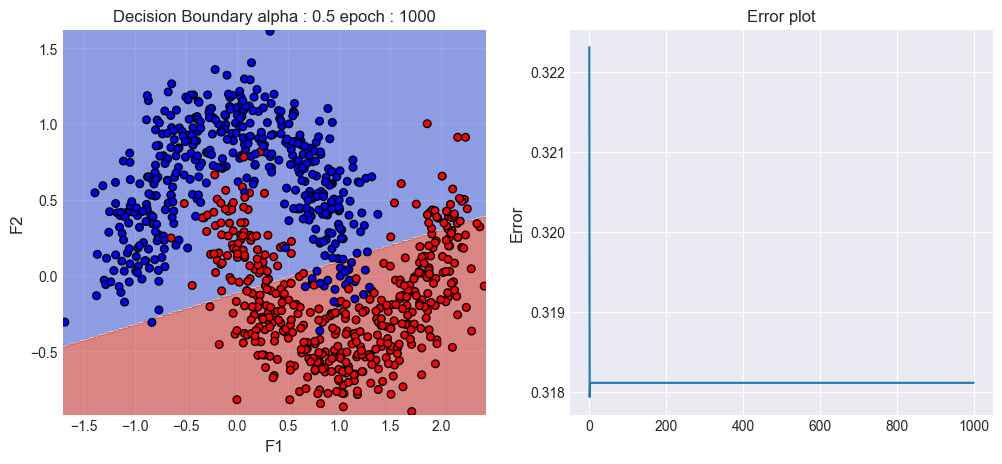

In [19]:

# for different values of epochs and alpha
for a in alphas:
    for e in epochs:
        error,weights = train_weights(train=data_train,alpha = a,n_epoch=e)
        fn_plot_decision_boundary2(data_train,weights,predict,a,e,error) #ploting decision boundary and error with different values of alpha and epoch